<a href="https://colab.research.google.com/github/shrad1997/Text_Mining/blob/main/Text_Mining_amazon_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#One plus nord 2 product review from amazon

1) Extract reviews of any product from ecommerce website like amazon,
2) Perform emotion mining

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [3]:
# Import extracted amazon reviews Dataset (How to Extract amazon reviews - Refer Extract Amazon Reviews using Scrapy.ipynb)
reviews=pd.read_excel('/content/one_plus_nord2_review.xlsx')
reviews

,Comments
0,Bakwas phone
1,Few issues are resolved that are mention below...
2,The best part of the phone is it's super simpl...
3,Phone looks good but features are 10k phone\nC...
4,Performance is really good - no lags at all
5,Perfectly smooth user experience.
6,"COD gaming - quality medium, frame rate max - ..."
7,"Quality high, max frame rate - fps - 45-58"
8,Battery easily lasts more than one day with 1 ...
9,Super fast charging.


## Text Preprocessing

In [6]:
reviews=[Comments.strip() for Comments in reviews.Comments] # remove both the leading and the trailing characters
reviews=[Comments for Comments in reviews if Comments] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['Bakwas phone',
 "Few issues are resolved that are mention below..but still this mobile hasn't the charm of OnePlus..\nIt is like a normal android..not an OnePlus..\nLow processing, Exceptional features of OnePlus are not there in this phone..\nTook so long time to delete items..\nBattery is draining fast..\nCharging is not as fast as claimed..\nEarlier I was using OnePlus 5T..I bought it to upgrade but unfortunately it degrades...",
 "The best part of the phone is it's super simple and user friendly operating system. Camera doesn't oversaturate colours and captures decent photos. Battery charging is super fast. People argue that this is overpriced in this segment but I guess ease of using the phone and mainly the OS wouldn't be so good in other comparable phones. It is super light and handy.\n\nEdit: taking away 1 star from the review after a month's usage.\nPhone app lags all the time. Phone starts ringing when I receive a call while the name of caller appears 5 seconds later. This 

In [7]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

"Bakwas phone Few issues are resolved that are mention below..but still this mobile hasn't the charm of OnePlus..\nIt is like a normal android..not an OnePlus..\nLow processing, Exceptional features of OnePlus are not there in this phone..\nTook so long time to delete items..\nBattery is draining fast..\nCharging is not as fast as claimed..\nEarlier I was using OnePlus 5T..I bought it to upgrade but unfortunately it degrades... The best part of the phone is it's super simple and user friendly operating system. Camera doesn't oversaturate colours and captures decent photos. Battery charging is super fast. People argue that this is overpriced in this segment but I guess ease of using the phone and mainly the OS wouldn't be so good in other comparable phones. It is super light and handy.\n\nEdit: taking away 1 star from the review after a month's usage.\nPhone app lags all the time. Phone starts ringing when I receive a call while the name of caller appears 5 seconds later. This is very a

In [8]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Bakwas phone Few issues are resolved that are mention belowbut still this mobile hasnt the charm of OnePlus\nIt is like a normal androidnot an OnePlus\nLow processing Exceptional features of OnePlus are not there in this phone\nTook so long time to delete items\nBattery is draining fast\nCharging is not as fast as claimed\nEarlier I was using OnePlus 5TI bought it to upgrade but unfortunately it degrades The best part of the phone is its super simple and user friendly operating system Camera doesnt oversaturate colours and captures decent photos Battery charging is super fast People argue that this is overpriced in this segment but I guess ease of using the phone and mainly the OS wouldnt be so good in other comparable phones It is super light and handy\n\nEdit taking away 1 star from the review after a months usage\nPhone app lags all the time Phone starts ringing when I receive a call while the name of caller appears 5 seconds later This is very annoying Similar issue while calling 

In [9]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Bakwas', 'phone', 'Few', 'issues', 'are', 'resolved', 'that', 'are', 'mention', 'belowbut', 'still', 'this', 'mobile', 'hasnt', 'the', 'charm', 'of', 'OnePlus', 'It', 'is', 'like', 'a', 'normal', 'androidnot', 'an', 'OnePlus', 'Low', 'processing', 'Exceptional', 'features', 'of', 'OnePlus', 'are', 'not', 'there', 'in', 'this', 'phone', 'Took', 'so', 'long', 'time', 'to', 'delete', 'items', 'Battery', 'is', 'draining', 'fast', 'Charging']


In [11]:
len(text_tokens)

562

In [13]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A','hasnt']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Bakwas', 'phone', 'Few', 'issues', 'resolved', 'mention', 'belowbut', 'still', 'mobile', 'charm', 'OnePlus', 'like', 'normal', 'androidnot', 'OnePlus', 'Low', 'processing', 'Exceptional', 'features', 'OnePlus', 'phone', 'Took', 'long', 'time', 'delete', 'items', 'Battery', 'draining', 'fast', 'Charging', 'fast', 'claimed', 'Earlier', 'using', 'OnePlus', '5TI', 'bought', 'upgrade', 'unfortunately', 'degrades', 'best', 'part', 'phone', 'super', 'simple', 'user', 'friendly', 'operating', 'system', 'Camera', 'doesnt', 'oversaturate', 'colours', 'captures', 'decent', 'photos', 'Battery', 'charging', 'super', 'fast', 'People', 'argue', 'overpriced', 'segment', 'guess', 'ease', 'using', 'phone', 'mainly', 'OS', 'wouldnt', 'good', 'comparable', 'phones', 'super', 'light', 'handy', 'Edit', 'taking', 'away', '1', 'star', 'review', 'months', 'usage', 'Phone', 'app', 'lags', 'time', 'Phone', 'starts', 'ringing', 'receive', 'call', 'name', 'caller', 'appears', '5', 'seconds', 'later', 'This', 'an

In [14]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['bakwas', 'phone', 'few', 'issues', 'resolved', 'mention', 'belowbut', 'still', 'mobile', 'charm', 'oneplus', 'like', 'normal', 'androidnot', 'oneplus', 'low', 'processing', 'exceptional', 'features', 'oneplus', 'phone', 'took', 'long', 'time', 'delete', 'items', 'battery', 'draining', 'fast', 'charging', 'fast', 'claimed', 'earlier', 'using', 'oneplus', '5ti', 'bought', 'upgrade', 'unfortunately', 'degrades', 'best', 'part', 'phone', 'super', 'simple', 'user', 'friendly', 'operating', 'system', 'camera', 'doesnt', 'oversaturate', 'colours', 'captures', 'decent', 'photos', 'battery', 'charging', 'super', 'fast', 'people', 'argue', 'overpriced', 'segment', 'guess', 'ease', 'using', 'phone', 'mainly', 'os', 'wouldnt', 'good', 'comparable', 'phones', 'super', 'light', 'handy', 'edit', 'taking', 'away', '1', 'star', 'review', 'months', 'usage', 'phone', 'app', 'lags', 'time', 'phone', 'starts', 'ringing', 'receive', 'call', 'name', 'caller', 'appears', '5', 'seconds', 'later', 'this', 'an

In [15]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['bakwa', 'phone', 'few', 'issu', 'resolv', 'mention', 'belowbut', 'still', 'mobil', 'charm', 'oneplu', 'like', 'normal', 'androidnot', 'oneplu', 'low', 'process', 'except', 'featur', 'oneplu', 'phone', 'took', 'long', 'time', 'delet', 'item', 'batteri', 'drain', 'fast', 'charg', 'fast', 'claim', 'earlier', 'use', 'oneplu', '5ti', 'bought', 'upgrad', 'unfortun', 'degrad', 'best', 'part', 'phone', 'super', 'simpl', 'user', 'friendli', 'oper', 'system', 'camera', 'doesnt', 'oversatur', 'colour', 'captur', 'decent', 'photo', 'batteri', 'charg', 'super', 'fast', 'peopl', 'argu', 'overpr', 'segment', 'guess', 'eas', 'use', 'phone', 'mainli', 'os', 'wouldnt', 'good', 'compar', 'phone', 'super', 'light', 'handi', 'edit', 'take', 'away', '1', 'star', 'review', 'month', 'usag', 'phone', 'app', 'lag', 'time', 'phone', 'start', 'ring', 'receiv', 'call', 'name', 'caller', 'appear', '5', 'second', 'later', 'thi', 'annoy', 'similar', 'issu', 'call', 'hope', 'softwar', 'updat', 'fix', 'issu', 'phone'

In [16]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

bakwas phone few issues resolved mention belowbut still mobile charm oneplus like normal androidnot oneplus low processing exceptional features oneplus phone took long time delete items battery draining fast charging fast claimed earlier using oneplus 5ti bought upgrade unfortunately degrades best part phone super simple user friendly operating system camera doesnt oversaturate colours captures decent photos battery charging super fast people argue overpriced segment guess ease using phone mainly os wouldnt good comparable phones super light handy edit taking away 1 star review months usage phone app lags time phone starts ringing receive call name caller appears 5 seconds later this annoying similar issue calling hope software update fixes issue phone looks good features 10k phone camera worst performance good recommend go like vivo oppo performance really good lags perfectly smooth user experience cod gaming quality medium frame rate max fps 5760 quality high max frame rate fps 4558 

In [17]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['bakwas', 'phone', 'few', 'issue', 'resolve', 'mention', 'belowbut', 'still', 'mobile', 'charm', 'oneplus', 'like', 'normal', 'androidnot', 'oneplus', 'low', 'processing', 'exceptional', 'feature', 'oneplus', 'phone', 'take', 'long', 'time', 'delete', 'item', 'battery', 'drain', 'fast', 'charge', 'fast', 'claim', 'earlier', 'use', 'oneplus', '5ti', 'buy', 'upgrade', 'unfortunately', 'degrade', 'good', 'part', 'phone', 'super', 'simple', 'user', 'friendly', 'operating', 'system', 'camera', 'do', 'not', 'oversaturate', 'colour', 'capture', 'decent', 'photo', 'battery', 'charge', 'super', 'fast', 'people', 'argue', 'overprice', 'segment', 'guess', 'ease', 'use', 'phone', 'mainly', 'os', 'would', 'not', 'good', 'comparable', 'phone', 'super', 'light', 'handy', 'edit', 'take', 'away', '1', 'star', 'review', 'month', 'usage', 'phone', 'app', 'lag', 'time', 'phone', 'start', 'ring', 'receive', 'call', 'name', 'caller', 'appear', '5', 'second', 'later', 'this', 'annoying', 'similar', 'issue',

In [18]:
clean_reviews=' '.join(lemmas)
clean_reviews

'bakwas phone few issue resolve mention belowbut still mobile charm oneplus like normal androidnot oneplus low processing exceptional feature oneplus phone take long time delete item battery drain fast charge fast claim earlier use oneplus 5ti buy upgrade unfortunately degrade good part phone super simple user friendly operating system camera do not oversaturate colour capture decent photo battery charge super fast people argue overprice segment guess ease use phone mainly os would not good comparable phone super light handy edit take away 1 star review month usage phone app lag time phone start ring receive call name caller appear 5 second later this annoying similar issue call hope software update fix issue phone look good feature 10k phone camera bad performance good recommend go like vivo oppo performance really good lag perfectly smooth user experience cod gaming quality medium frame rate max fps 5760 quality high max frame rate fp 4558 battery easily last one day 1 hour gaming 23

## Feature Extaction

### 1. Using CountVectorizer

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [20]:
print(cv.vocabulary_)

{'bakwas': 25, 'phone': 146, 'few': 69, 'issue': 95, 'resolve': 160, 'mention': 114, 'belowbut': 27, 'still': 187, 'mobile': 115, 'charm': 39, 'oneplus': 129, 'like': 105, 'normal': 123, 'androidnot': 15, 'low': 109, 'processing': 152, 'exceptional': 63, 'feature': 67, 'take': 192, 'long': 106, 'time': 195, 'delete': 47, 'item': 96, 'battery': 26, 'drain': 50, 'fast': 66, 'charge': 38, 'claim': 40, 'earlier': 51, 'use': 201, '5ti': 9, 'buy': 30, 'upgrade': 199, 'unfortunately': 197, 'degrade': 46, 'good': 81, 'part': 140, 'super': 190, 'simple': 172, 'user': 202, 'friendly': 75, 'operating': 130, 'system': 191, 'camera': 34, 'do': 49, 'not': 124, 'oversaturate': 137, 'colour': 42, 'capture': 35, 'decent': 45, 'photo': 147, 'people': 142, 'argue': 19, 'overprice': 136, 'segment': 168, 'guess': 83, 'ease': 53, 'mainly': 110, 'os': 133, 'would': 214, 'comparable': 43, 'light': 104, 'handy': 85, 'edit': 55, 'away': 21, 'star': 183, 'review': 161, 'month': 117, 'usage': 200, 'app': 17, 'lag

In [21]:
print(cv.get_feature_names()[150:300])

['price', 'priority', 'processing', 'quality', 'rate', 'really', 'rear', 'receive', 'recommend', 'redmi', 'resolve', 'review', 'ring', 'satisfied', 'save', 'second', 'secsto', 'seem', 'segment', 'selfie', 'service', 'similar', 'simple', 'simply', 'single', 'slider', 'smooth', 'so', 'software', 'someone', 'speaker', 'specification', 'stabilization', 'star', 'start', 'stay', 'steady', 'still', 'suck', 'suggest', 'super', 'system', 'take', 'think', 'this', 'time', 'trust', 'unfortunately', 'update', 'upgrade', 'usage', 'use', 'user', 'ut', 'vivo', 'volcano', 'want', 'waste', 'weight', 'well', 'while', 'will', 'work', 'worst', 'would', 'write', 'year', 'youtubenetflix']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
print(reviewscv.toarray().shape)

(361, 218)


### 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [24]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [25]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['10k', '23', 'almost', 'awesome', 'bad', 'battery', 'buy', 'call', 'camera', 'change', 'charge', 'colour', 'day', 'do', 'else', 'especially', 'fast', 'feature', 'fine', 'frame', 'front', 'gaming', 'get', 'go', 'good', 'hour', 'issue', 'lag', 'light', 'like', 'look', 'max', 'mobile', 'money', 'nice', 'not', 'omission', 'one', 'oneplus', 'operating', 'oppo', 'option', 'os', 'other', 'overall', 'overprice', 'oversaturate', 'oxygen', 'page', 'part', 'pathetic', 'people', 'perfectly', 'performance', 'personally', 'phone', 'photo', 'pixel', 'premium', 'price', 'priority', 'processing', 'quality', 'rate', 'really', 'rear', 'receive', 'recommend', 'redmi', 'review', 'selfie', 'software', 'still', 'suck', 'suggest', 'super', 'system', 'take', 'think', 'this', 'time', 'trust', 'unfortunately', 'update', 'upgrade', 'usage', 'use', 'user', 'ut', 'volcano', 'want', 'waste', 'weight', 'well', 'while', 'will', 'work', 'worst', 'would', 'write']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### 3. TF-IDF Vectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [27]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10k', '19', '23', '24k', '25k', '30', '4558', '4a', '5760', '5ti', '90', 'alert', 'almost', 'also', 'amazing', 'androidnot', 'annoying', 'app', 'appear', 'argue', 'atleast', 'away', 'awesome', 'bad', 'baffle', 'bakwas', 'battery', 'belowbut', 'better', 'brand', 'buy', 'by', 'call', 'caller', 'camera', 'capture', 'change', 'charcoal', 'charge', 'charm', 'claim', 'cod', 'colour', 'comparable', 'day', 'decent', 'degrade', 'delete', 'device', 'do', 'drain', 'earlier', 'earn', 'ease', 'easily', 'edit', 'else', 'enjoy', 'enough', 'especially', 'etc', 'even', 'everything', 'exceptional', 'experience', 'far', 'fast', 'feature', 'feel', 'few', 'fine', 'fix', 'fp', 'fps', 'frame', 'friendly', 'front', 'gaming', 'get', 'give', 'go', 'good', 'grace', 'guess', 'hand', 'handy', 'happy', 'hard', 'headache', 'heat', 'high', 'hope', 'hour', 'indoor', 'iqoo', 'issue', 'item', 'jun', 'junupdate', 'know', 'lag', 'last', 'later', 'let', 'light', 'like', 'long', 'look', 'loud', 'low', 'mainly', 'make', 'm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Generate Word Cloud

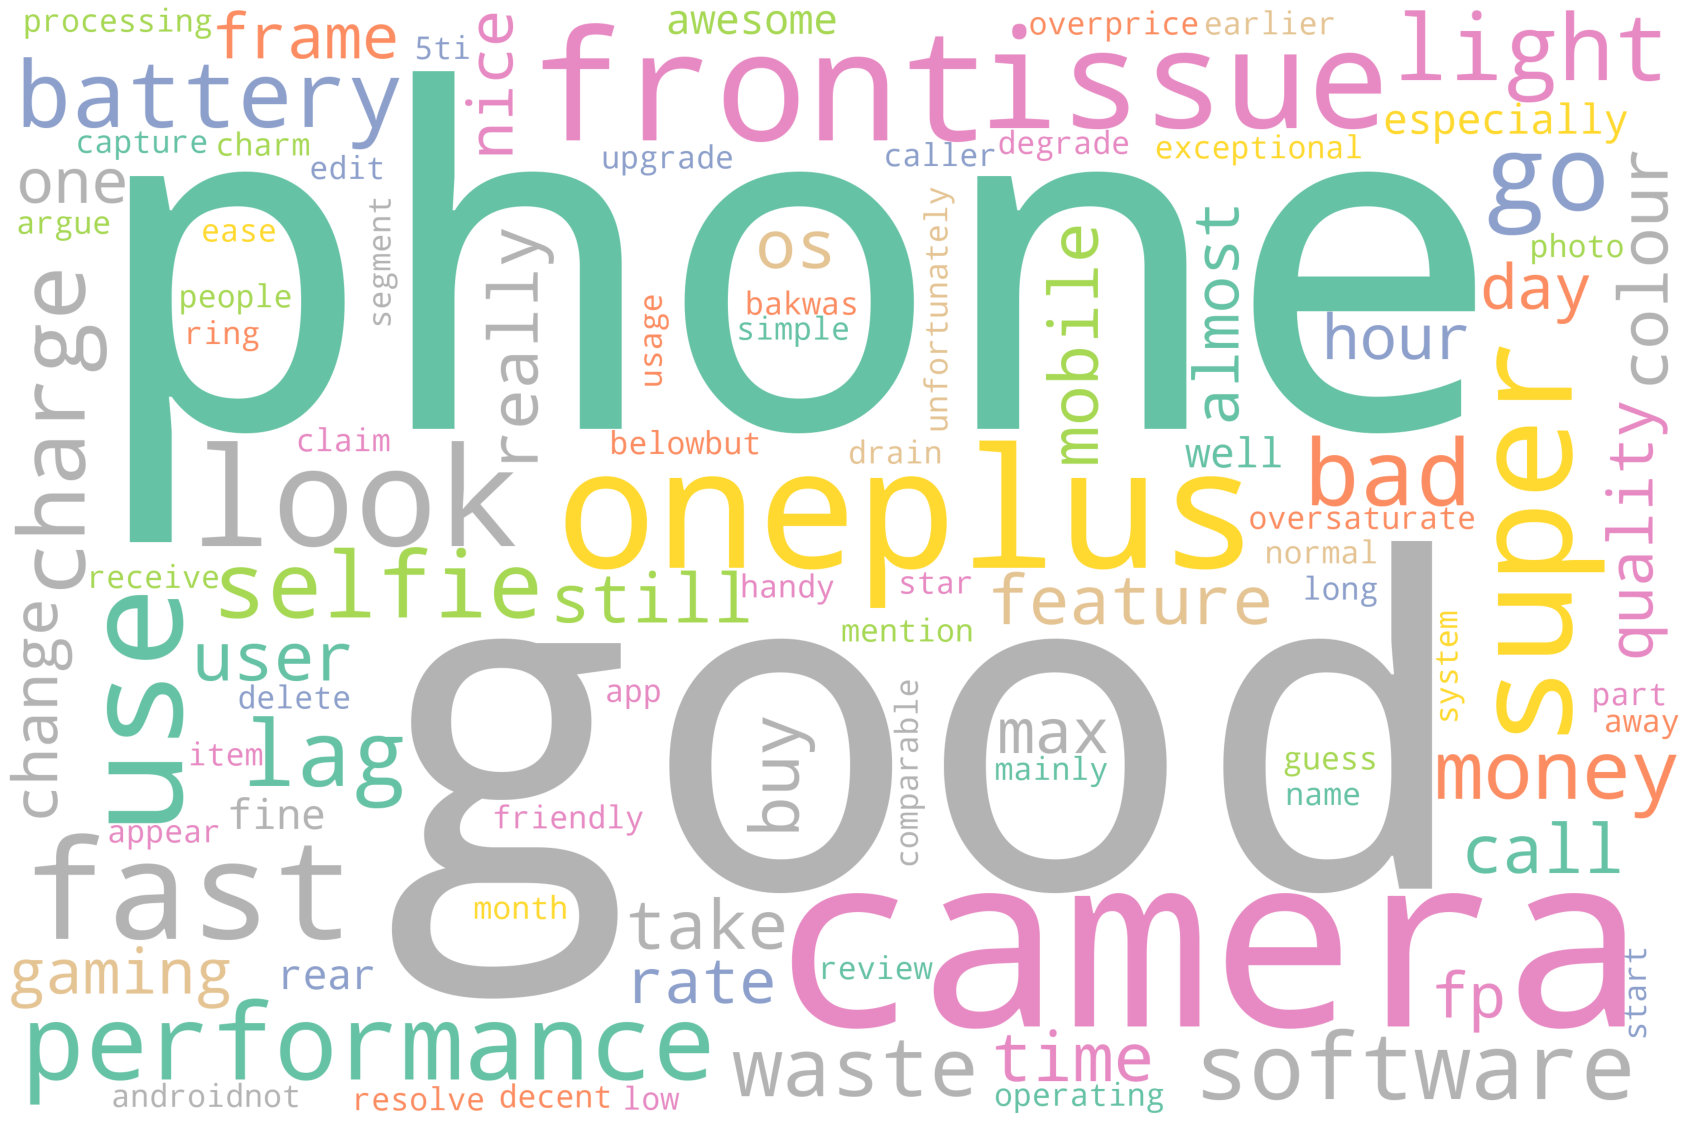

In [56]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(30,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [29]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [30]:
for token in doc_block[100:200]:
    print(token,token.pos_)

second ADV
later ADV
this DET
annoying ADJ
similar ADJ
issue NOUN
call NOUN
hope NOUN
software NOUN
update NOUN
fix NOUN
issue NOUN
phone NOUN
look VERB
good ADJ
feature NOUN
10k NOUN
phone NOUN
camera NOUN
bad ADJ
performance NOUN
good ADJ
recommend NOUN
go VERB
like INTJ
vivo PROPN
oppo PROPN
performance NOUN
really ADV
good ADJ
lag NOUN
perfectly ADV
smooth ADJ
user NOUN
experience NOUN
cod NOUN
gaming NOUN
quality NOUN
medium ADJ
frame NOUN
rate NOUN
max NOUN
fps ADP
5760 NUM
quality NOUN
high ADJ
max NOUN
frame NOUN
rate NOUN
fp PROPN
4558 NUM
battery NOUN
easily ADV
last ADJ
one NUM
day NOUN
1 NUM
hour NOUN
gaming NOUN
23 NUM
hour NOUN
youtubenetflix X
etc X
super ADV
fast ADJ
charge NOUN
camera NOUN
good NOUN
not PART
good ADJ
pixel PROPN
4a NOUN
almost ADV
90 NUM
good ADJ
single ADJ
speaker NOUN
let VERB
still ADV
enough ADV
loud ADV
no DET
ois NOUN
software NOUN
stabilization NOUN
good ADJ
overall ADV
satisfied ADJ
phone NOUN
really ADV
enjoy VERB
use VERB
phone NOUN
simply AD

In [31]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['software', 'stabilization', 'phone', 'enjoy', 'use', 'phone', 'trust', 'oneplus', 'know', 'make', 'phone', 'junupdate', 'use', 'day', 'camera', 'suck', 'change', 'phone', 'year', 'phone', 'camera', 'lag', 'camera', 'stay', 'secsto', 'selfie', 'look', 'change', 'phone', 'camera', 'think', 'camera', 'go', 'give', 'light', 'write', 'page', 'camera', 'performance', 'camera', 'work', 'issue', 'front', 'money', 'get', 'waste', 'jun', 'look', 'feel', 'hand', 'light', 'weight', 'want', 'camera', 'selfie', 'camera', 'camera', 'mobile', 'waste', 'earn', 'money', 'device', 'phone', 'camera', 'look', 'option', '25k', 'go', 'waste', 'money', 'phone', 'heat', 'volcano', 'will', 'suggest', 'go', 'brand', 'camera', 'omission', 'alert', 'slider', 'seem', 'price', 'oxygen', 'oneplus', 'save', 'grace', 'specification', 'buy', 'software', 'performance', 'number', 'priority', 'get', 'phone', 'redmi']


In [32]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,18
1,camera,15
2,oneplus,5
3,issue,4
4,use,4
5,look,4
6,performance,4
7,go,4
8,battery,3
9,charge,3


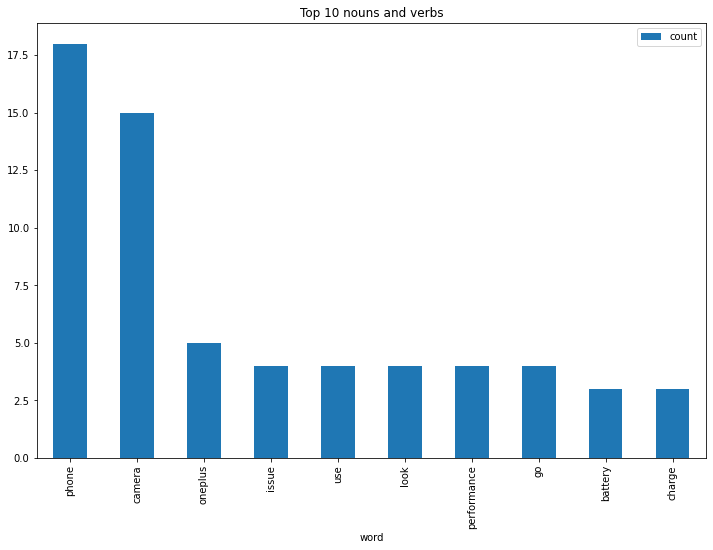

In [33]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [34]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

["Bakwas phone Few issues are resolved that are mention below..but still this mobile hasn't the charm of OnePlus..",
 'It is like a normal android..not an OnePlus..\nLow processing, Exceptional features of OnePlus are not there in this phone..',
 'Took so long time to delete items..',
 'Battery is draining fast..',
 'Charging is not as fast as claimed..',
 'Earlier I was using OnePlus 5T..I bought it to upgrade but unfortunately it degrades...',
 "The best part of the phone is it's super simple and user friendly operating system.",
 "Camera doesn't oversaturate colours and captures decent photos.",
 'Battery charging is super fast.',
 "People argue that this is overpriced in this segment but I guess ease of using the phone and mainly the OS wouldn't be so good in other comparable phones.",
 'It is super light and handy.',
 "Edit: taking away 1 star from the review after a month's usage.",
 'Phone app lags all the time.',
 'Phone starts ringing when I receive a call while the name of ca

In [35]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Bakwas phone Few issues are resolved that are ...
1,It is like a normal android..not an OnePlus..\...
2,Took so long time to delete items..
3,Battery is draining fast..
4,Charging is not as fast as claimed..
5,Earlier I was using OnePlus 5T..I bought it to...
6,The best part of the phone is it's super simpl...
7,Camera doesn't oversaturate colours and captur...
8,Battery charging is super fast.
9,People argue that this is overpriced in this s...


In [37]:
# Emotion Lexicon - Affin
affin=pd.read_csv('/content/Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [38]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [39]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [46]:
# manual testing
calculate_sentiment(text='best')

3

In [47]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      5
1      2
2      0
3      0
4      0
5     -2
6      8
7      0
8      3
9      5
10     3
11     0
12    -1
13     0
14    -2
15     0
16     2
17    11
18     0
19     0
20     3
21     3
22     6
23     0
24     2
25     2
26     2
27     4
28    -1
29     0
30     6
31    11
32     2
33     0
34     3
35     3
36     2
37     6
38     0
39     0
Name: sentiment_value, dtype: int64

In [48]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0     18
1     20
2      7
3      4
4      7
5     14
6     15
7      8
8      5
9     29
10     6
11    12
12     6
13    17
14     4
15     4
16     7
17    36
18    11
19    25
20     3
21     4
22    11
23    10
24     7
25     6
26     5
27    10
28    89
29    16
30    52
31    16
32    11
33     8
34     5
35     4
36    16
37    18
38    10
39    11
Name: word_count, dtype: int64

In [49]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
5,Earlier I was using OnePlus 5T..I bought it to...,-2,14
14,This is very annoying.,-2,4
28,"23 jun-Update after using almost 4 days,\nFron...",-1,89
12,Phone app lags all the time.,-1,6
19,"Quality high, max frame rate - fps - 45-58 Bat...",0,25
33,Will suggest all to go for other brands.,0,8
29,"Rear camera works fine, no issues with that bu...",0,16
23,"Single speaker is a let down, but still enough...",0,10
38,Buy it if software performance is your number ...,0,10
18,"COD gaming - quality medium, frame rate max - ...",0,11


In [50]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    40.000000
mean      2.200000
std       3.114894
min      -2.000000
25%       0.000000
50%       2.000000
75%       3.000000
max      11.000000
Name: sentiment_value, dtype: float64

In [51]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
2,Took so long time to delete items..,0,7
3,Battery is draining fast..,0,4
4,Charging is not as fast as claimed..,0,7
5,Earlier I was using OnePlus 5T..I bought it to...,-2,14
7,Camera doesn't oversaturate colours and captur...,0,8
11,Edit: taking away 1 star from the review after...,0,12
12,Phone app lags all the time.,-1,6
13,Phone starts ringing when I receive a call whi...,0,17
14,This is very annoying.,-2,4
15,Similar issue while calling.,0,4


In [52]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,Bakwas phone Few issues are resolved that are ...,5,18
1,It is like a normal android..not an OnePlus..\...,2,20
6,The best part of the phone is it's super simpl...,8,15
8,Battery charging is super fast.,3,5
9,People argue that this is overpriced in this s...,5,29
10,It is super light and handy.,3,6
16,Hope some software update fixes this issue.,2,7
17,Phone looks good but features are 10k phone\nC...,11,36
20,Super fast charging.,3,3
21,Cameras are good too.,3,4


In [53]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Bakwas phone Few issues are resolved that are ...,5,18,0
1,It is like a normal android..not an OnePlus..\...,2,20,1
2,Took so long time to delete items..,0,7,2
3,Battery is draining fast..,0,4,3
4,Charging is not as fast as claimed..,0,7,4
5,Earlier I was using OnePlus 5T..I bought it to...,-2,14,5
6,The best part of the phone is it's super simpl...,8,15,6
7,Camera doesn't oversaturate colours and captur...,0,8,7
8,Battery charging is super fast.,3,5,8
9,People argue that this is overpriced in this s...,5,29,9


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


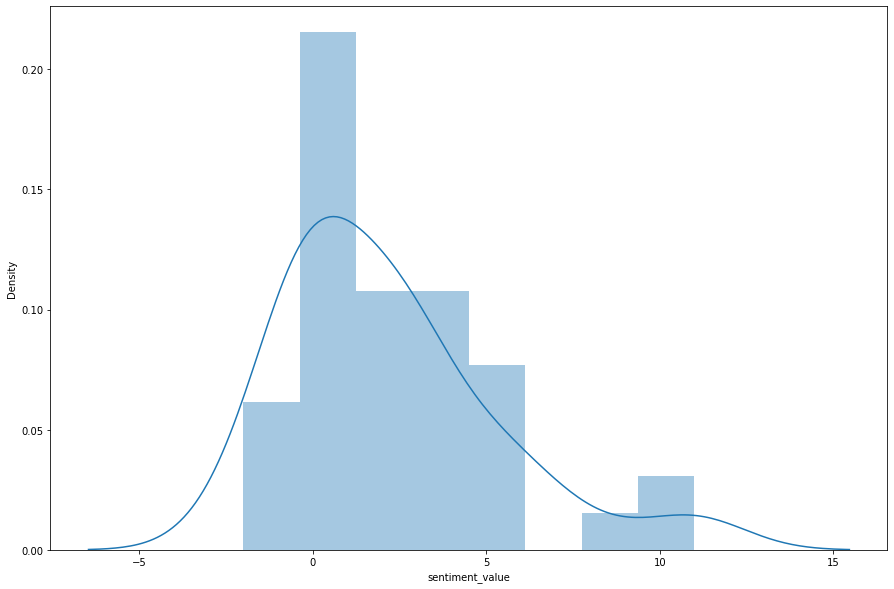

In [54]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

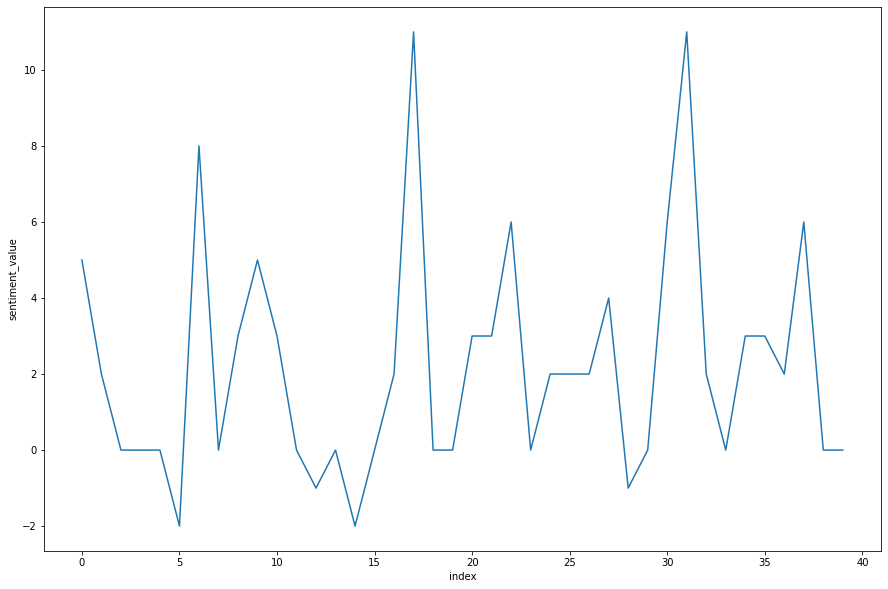

In [55]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)